In [1]:
# Imports de avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulacao de dados
import pandas as pd
import numpy as np

# Import para visualizacao dos dados
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Imports de bibliotecas para treinamento de redes neurais
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.2.0


In [2]:
# Versões dos pacotes usados neste jupyter notebook
!pip install -q watermark
%reload_ext watermark
%watermark -a "Prática - Modulo 04 - Camila" --iversi

numpy            1.19.1
tensorflow       2.2.0
pandas           1.1.1
tensorflow.keras 2.3.0-tf
matplotlib       3.3.1
Prática - Modulo 04 - Camila


In [ ]:
#Definindo algumas variáveis GLOBAIS
#Carregar os dados¶



In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


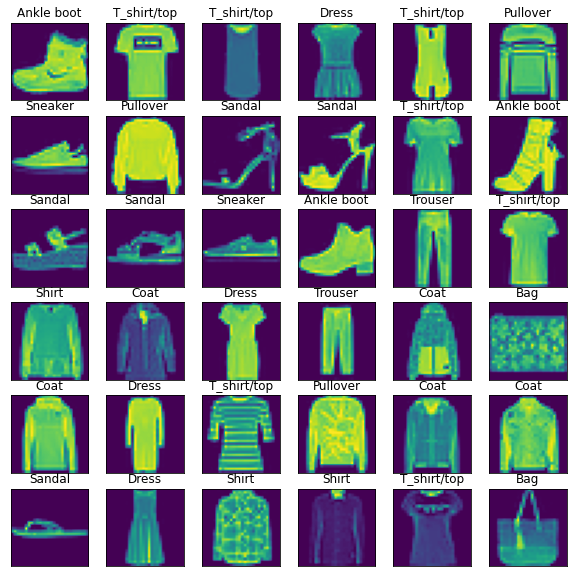

In [5]:
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()


In [6]:
batch_size = 32
epochs     = 10

In [7]:
x_train = train_images / 255.0
x_test  = test_images / 255.0

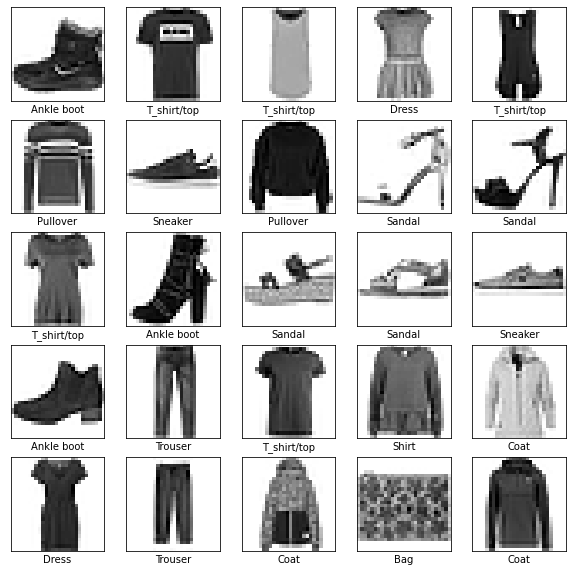

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [10]:
model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])


In [11]:
model.fit(train_images,
          train_labels,
          batch_size = batch_size,
          epochs     = epochs,
          verbose    = 2)

Epoch 1/10
1875/1875 - 5s - loss: 3.5487 - accuracy: 0.7211
Epoch 2/10
1875/1875 - 6s - loss: 0.6319 - accuracy: 0.7732
Epoch 3/10
1875/1875 - 5s - loss: 0.5704 - accuracy: 0.7977
Epoch 4/10
1875/1875 - 7s - loss: 0.5300 - accuracy: 0.8194
Epoch 5/10
1875/1875 - 5s - loss: 0.5011 - accuracy: 0.8288
Epoch 6/10
1875/1875 - 6s - loss: 0.4855 - accuracy: 0.8344
Epoch 7/10
1875/1875 - 7s - loss: 0.4802 - accuracy: 0.8373
Epoch 8/10
1875/1875 - 6s - loss: 0.4739 - accuracy: 0.8393
Epoch 9/10
1875/1875 - 7s - loss: 0.4693 - accuracy: 0.8420
Epoch 10/10
1875/1875 - 6s - loss: 0.4588 - accuracy: 0.8435


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 1s - loss: 0.5078 - accuracy: 0.8341

Test accuracy:  0.8341000080108643


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([2.4660741e-26, 2.5008445e-24, 0.0000000e+00, 1.6382816e-15,
       0.0000000e+00, 9.5530860e-03, 4.4726090e-26, 1.0686751e-02,
       4.2065981e-19, 9.7976011e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
               
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
               
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


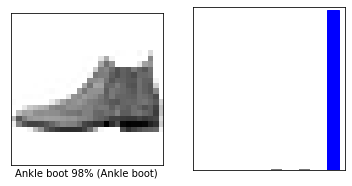

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

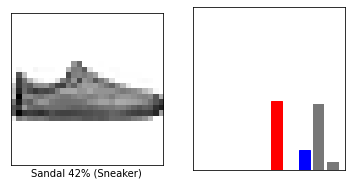

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

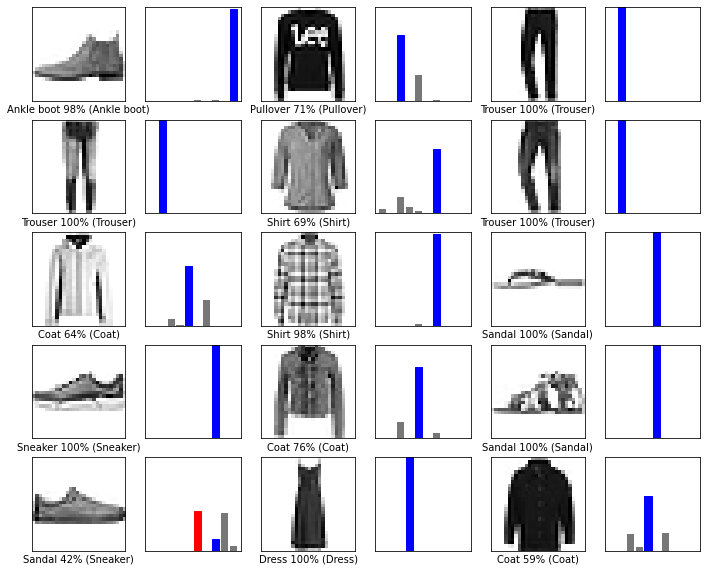

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
    
plt.show()

In [20]:
img = test_images[0]

print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.4660931e-26 2.5008539e-24 0.0000000e+00 1.6382878e-15 0.0000000e+00
  9.5530860e-03 4.4726432e-26 1.0686711e-02 4.2066304e-19 9.7976011e-01]]


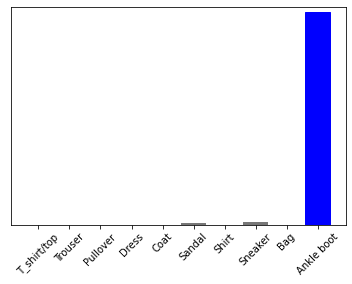

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
np.argmax(predictions_single[0])

9